In [1]:
%matplotlib inline
# You’ll need display() to render in Colab/Jupyter
from IPython.display import display, HTML, Image
from structures import Environment
from structures import StructureLayer
from fireSimulation import FireLayer, SmokeLayer
from aids import LightStripLayer, FireAlarmLayer
import matplotlib.pyplot as plt
from mapLoading import *
import numpy as np
from EvaluationMetrics import Evaluation
from FireAlarm_config import get_firealarm_config
import random
import pandas as pd
import os

In [2]:
seed_range = 10
random.seed(42)
seeds = [random.randint(0, 10000) for _ in range(seed_range)]
print(seeds)

[1824, 409, 4506, 4012, 3657, 2286, 1679, 8935, 1424, 9674]


Evacuee count: 11


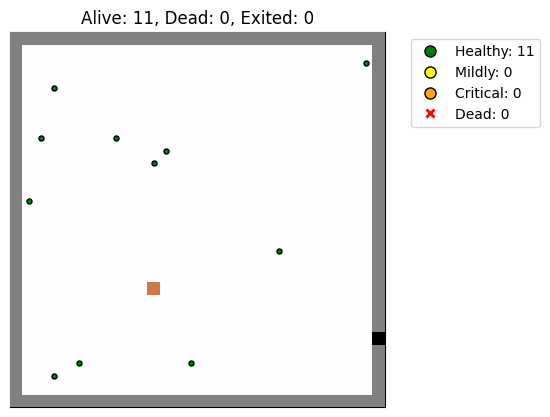

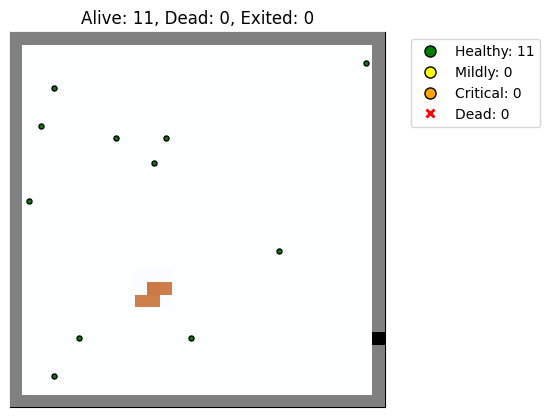

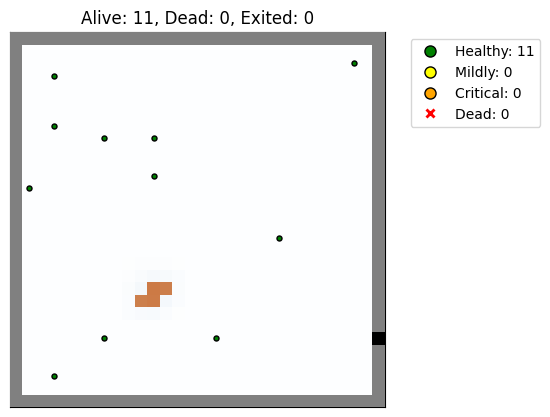

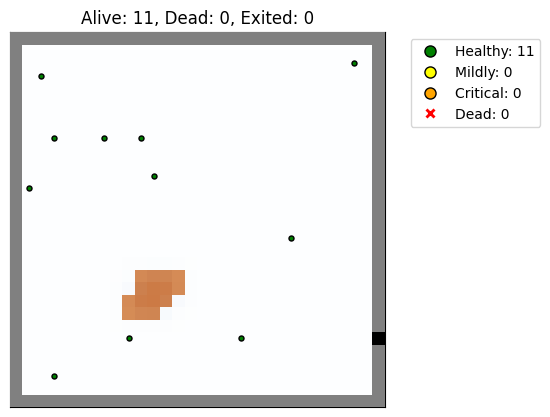

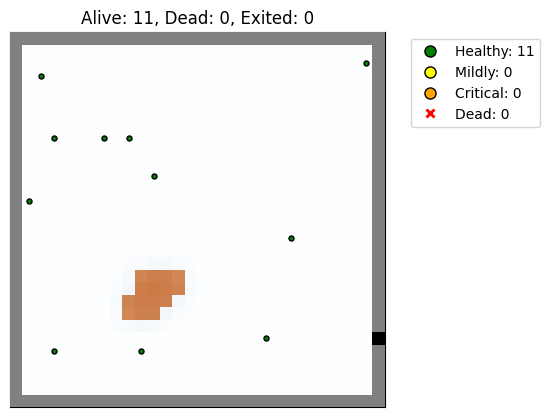

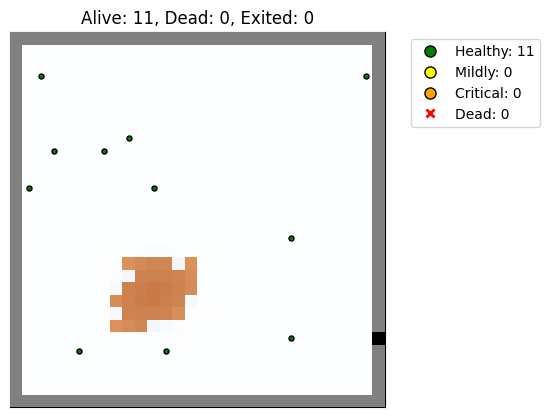

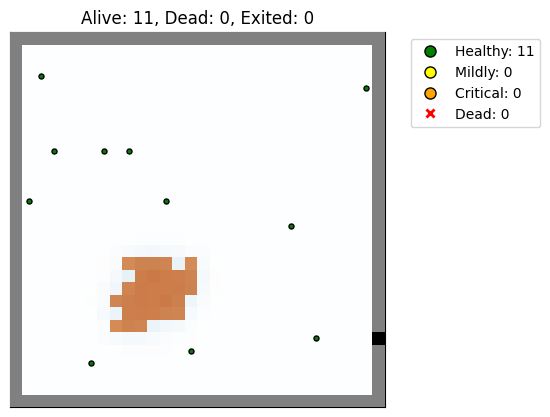

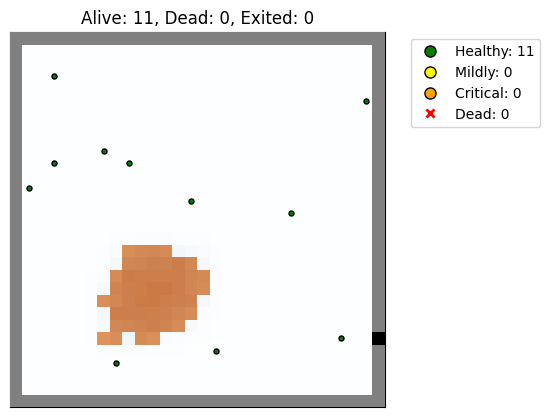

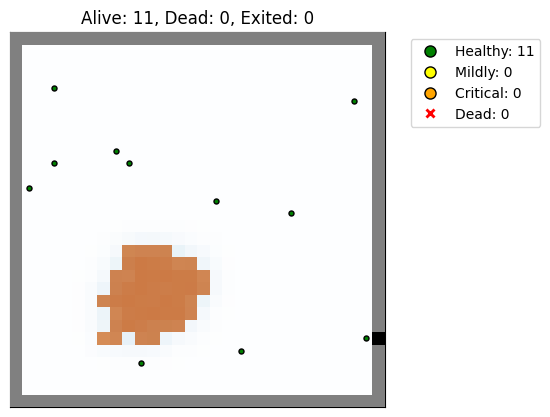

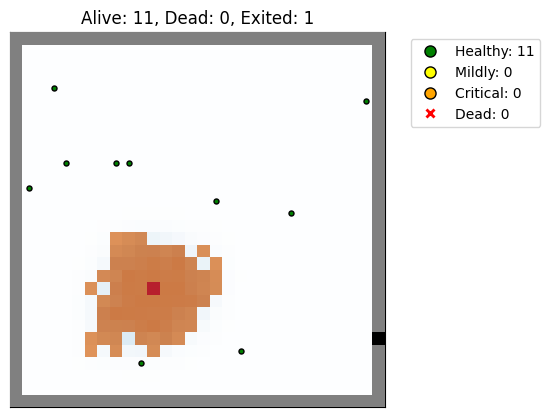

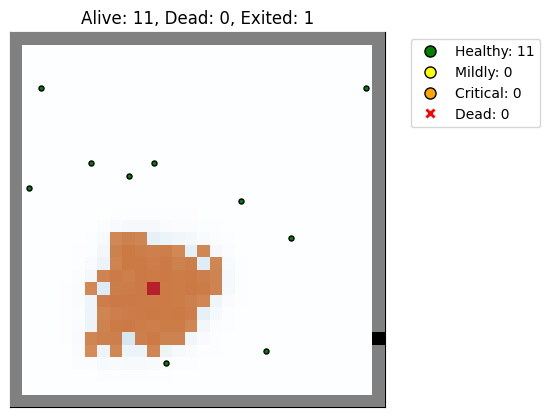

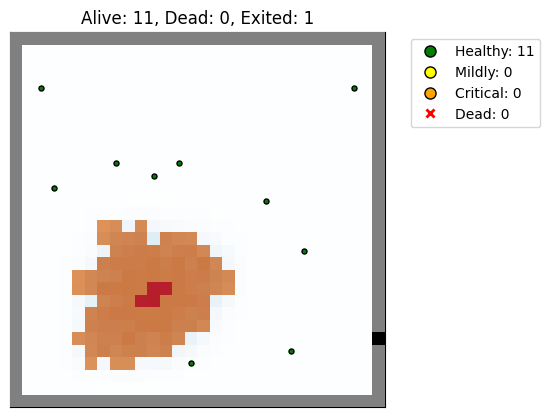

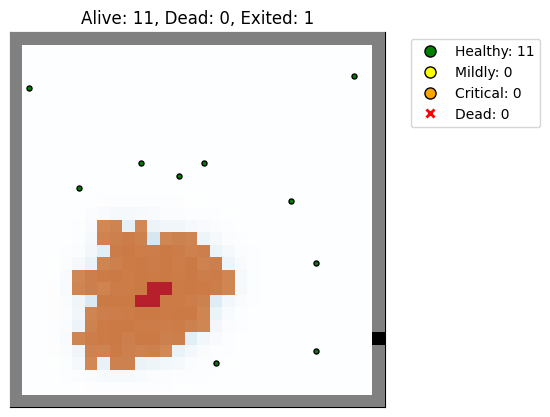

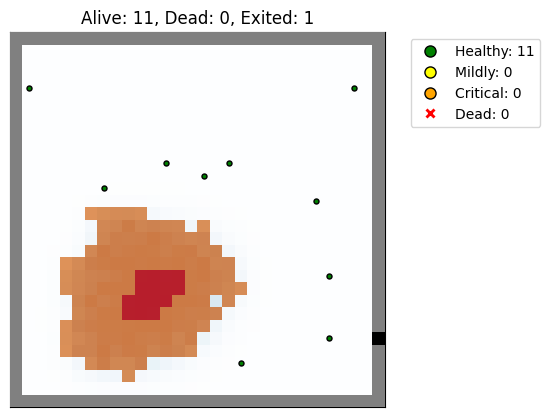

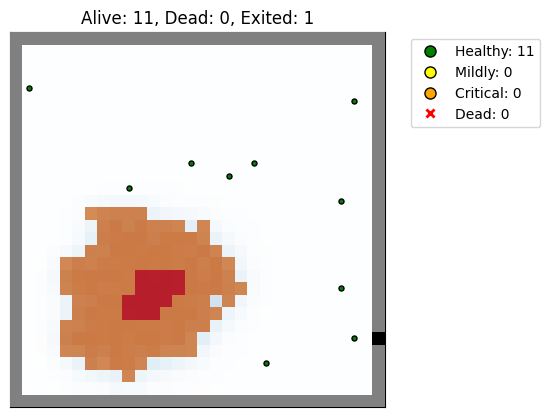

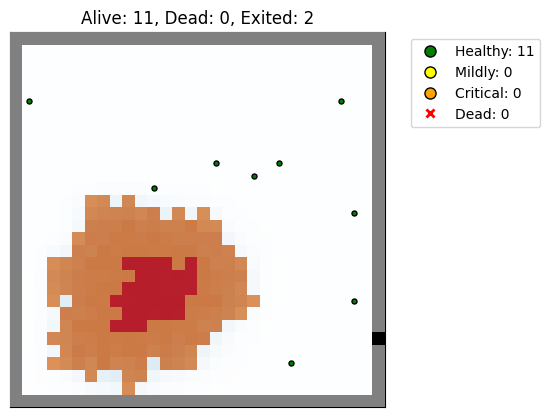

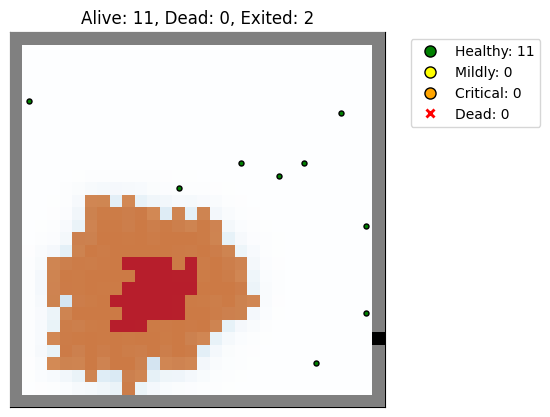

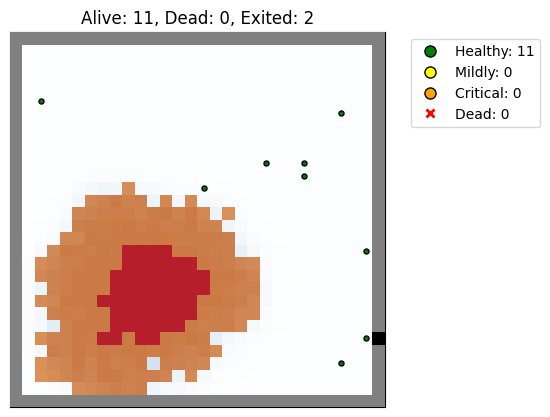

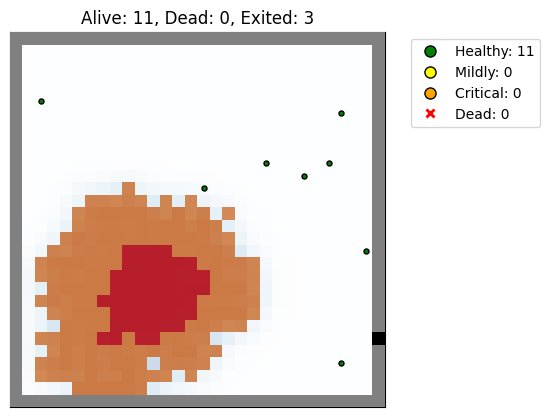

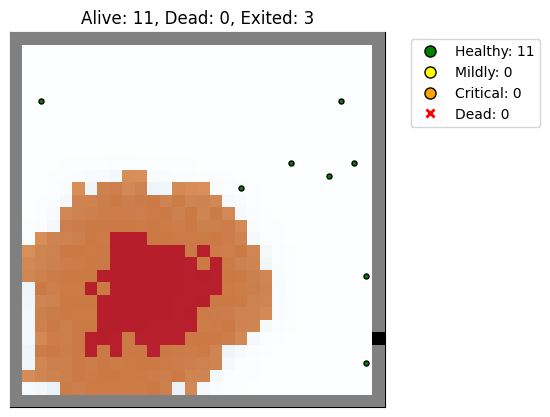

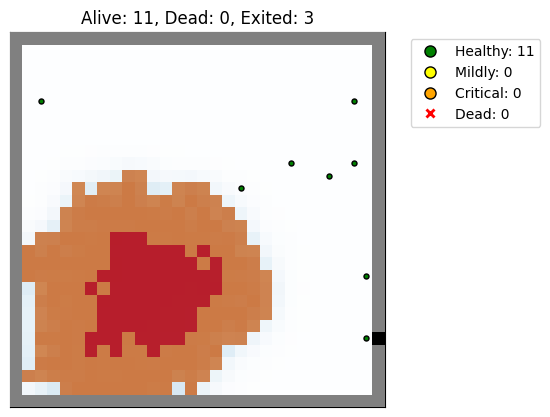

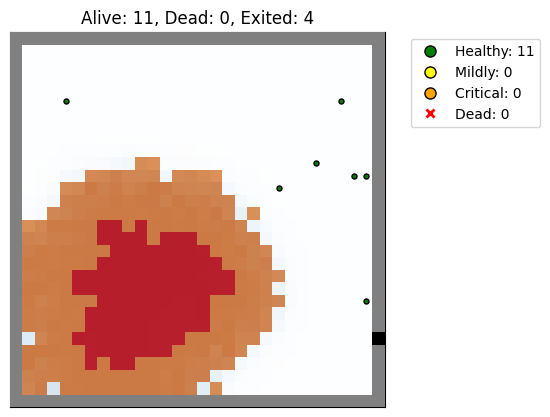

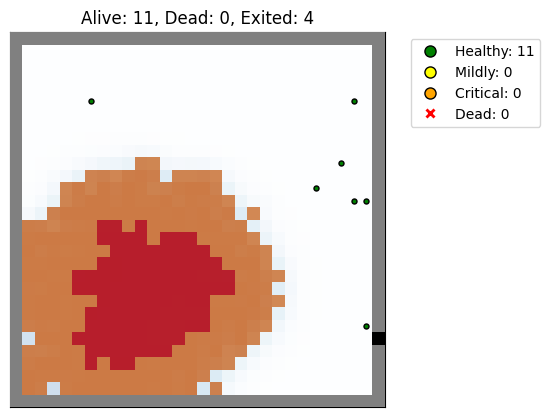

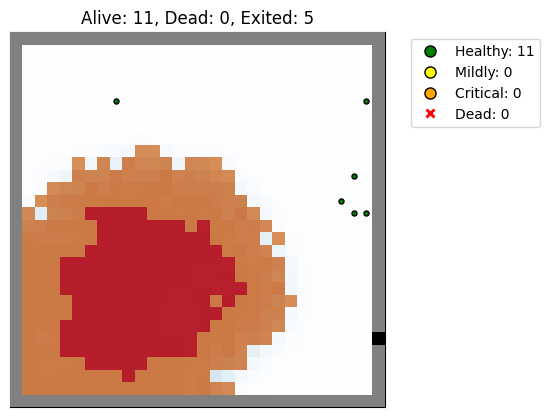

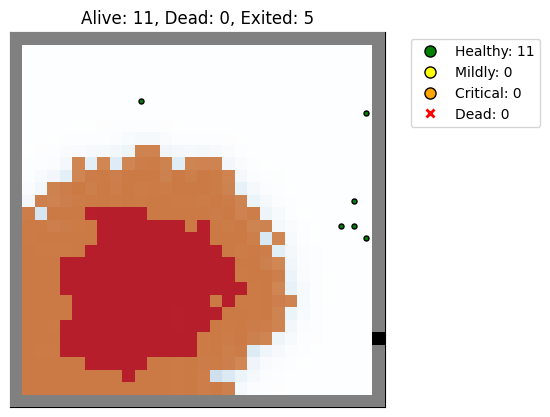

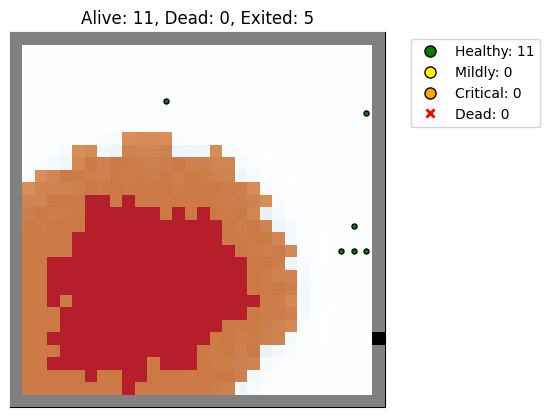

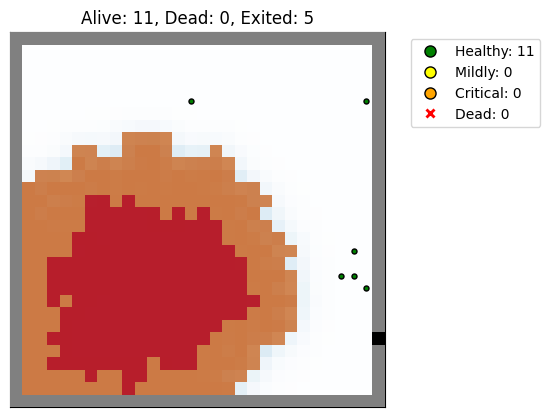

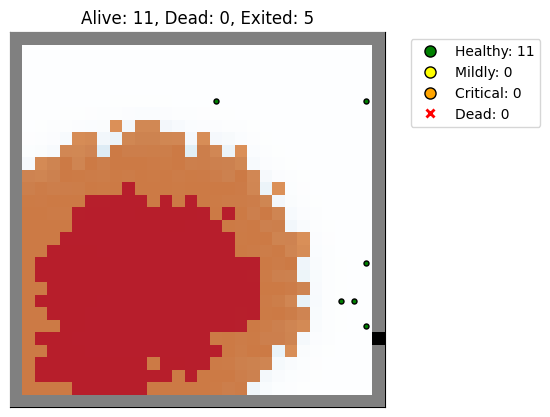

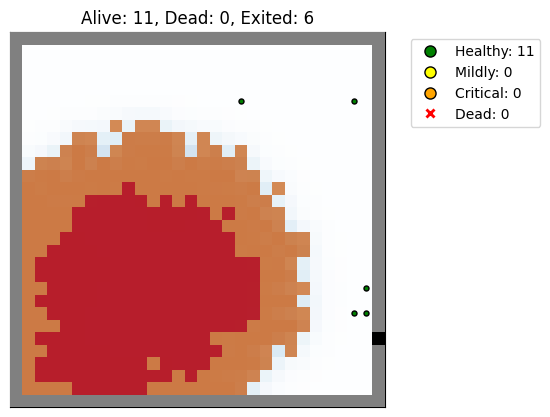

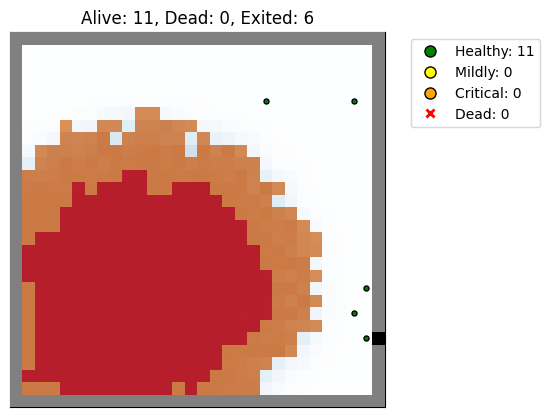

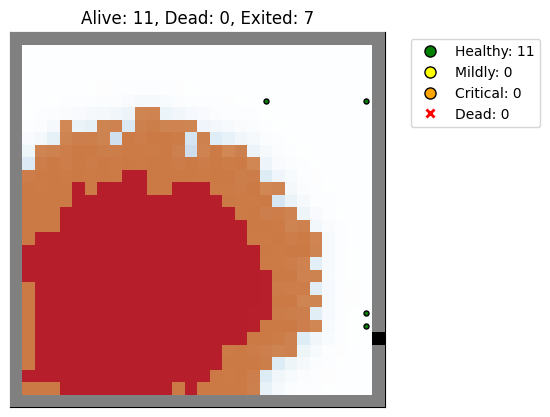

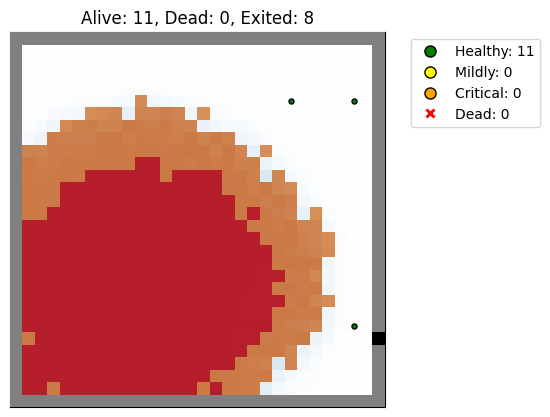

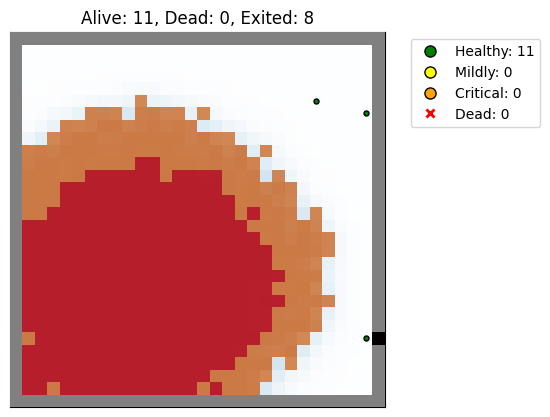

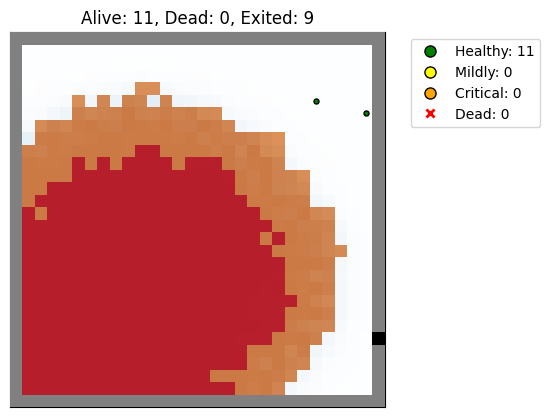

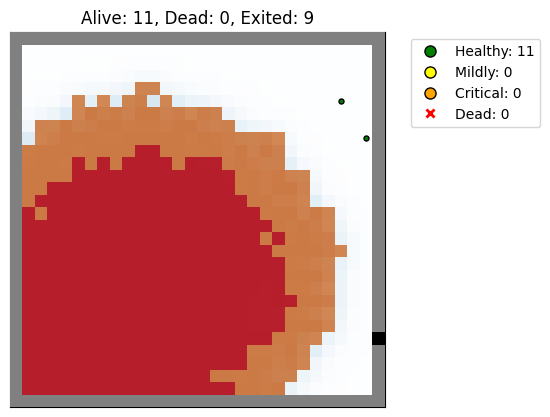

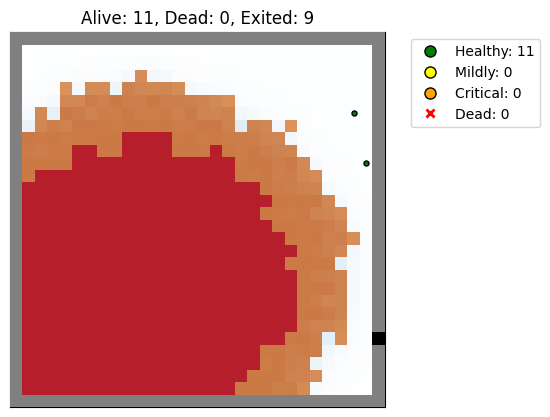

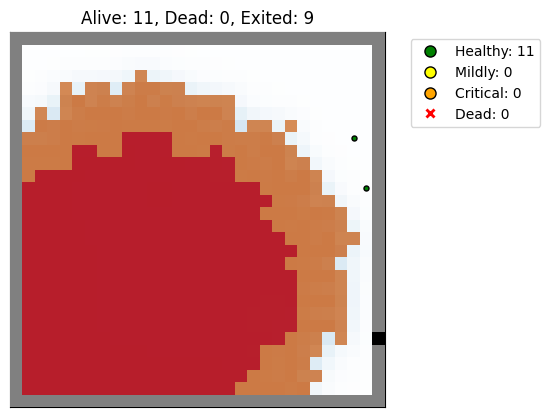

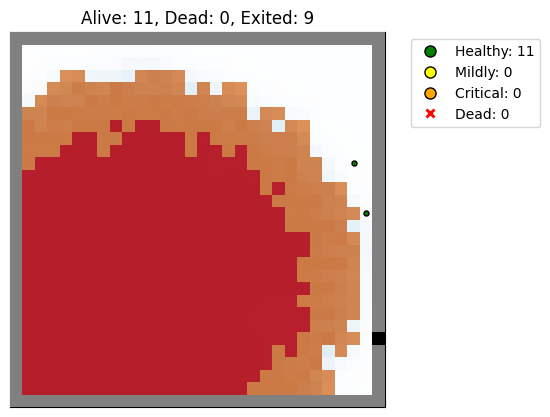

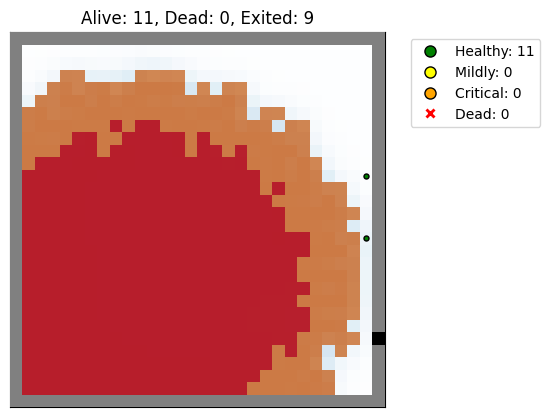

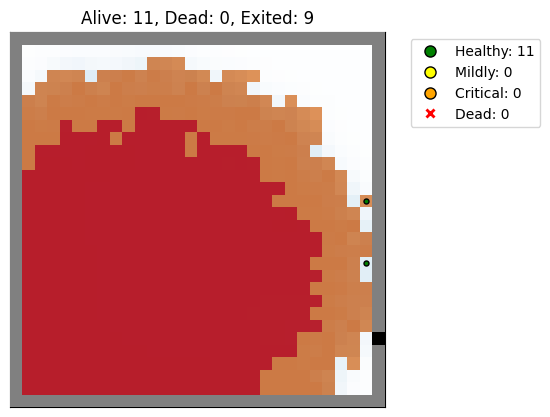

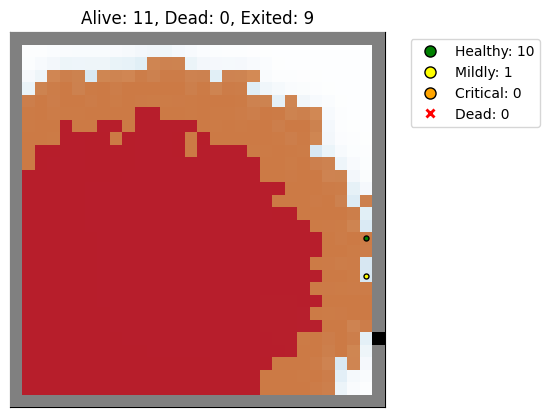

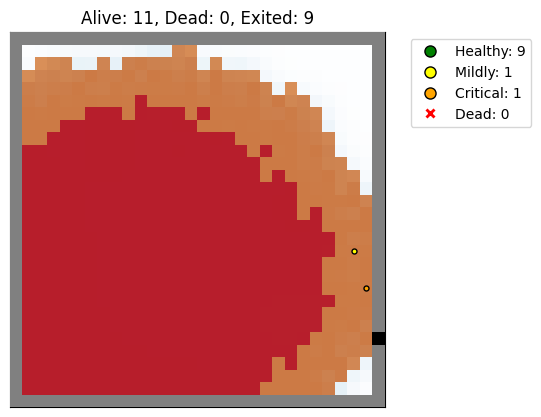

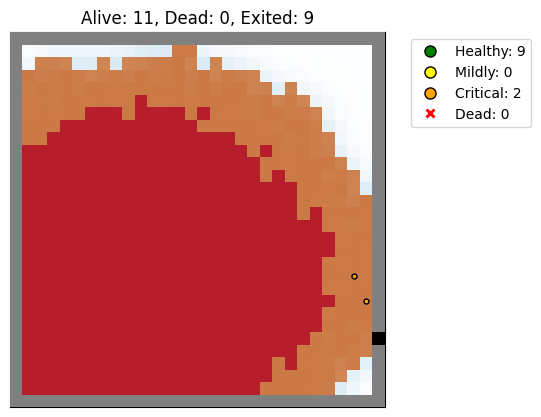

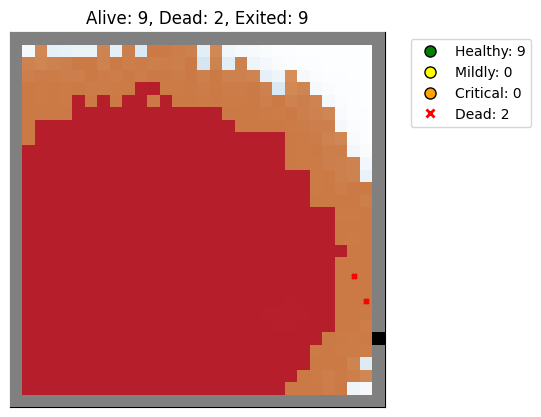

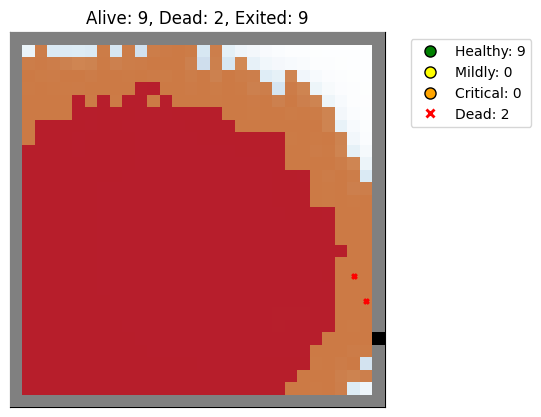

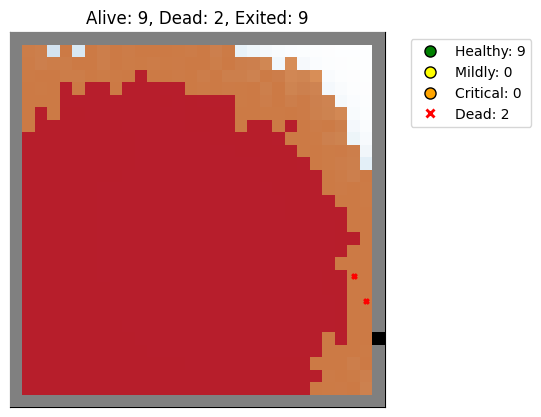

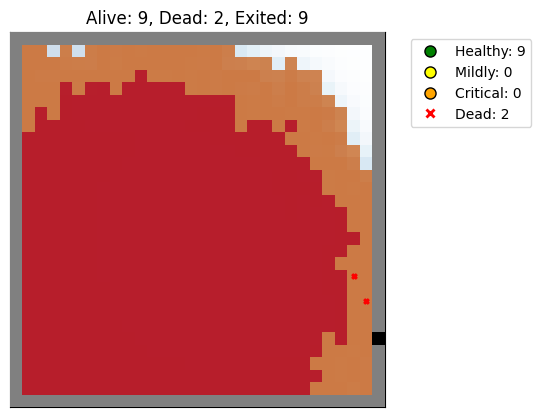

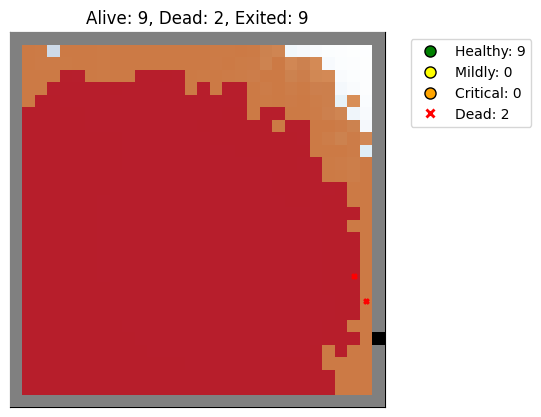

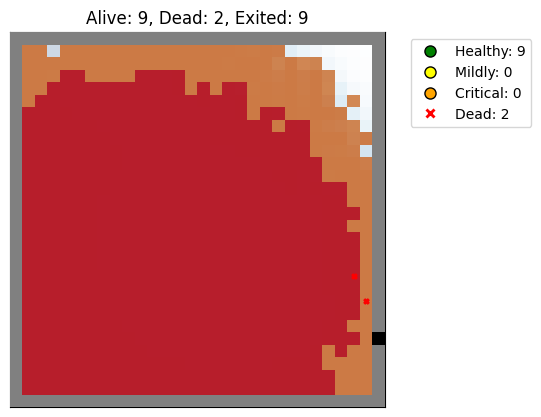

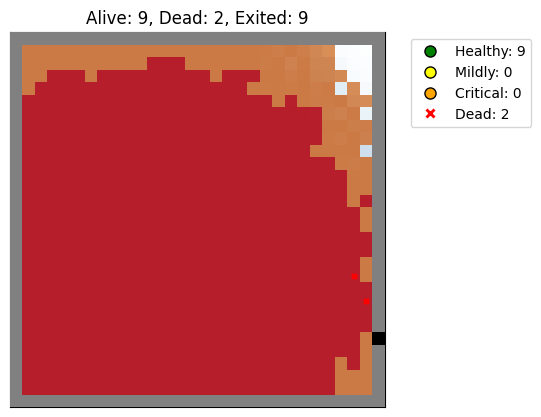

In [2]:
if __name__ == "__main__":
    steps = 50
    density = "small"
    scene = "no aids"
    filepath = './maps/baseline_1.png'
    floormap = loadFromImage(filepath)
    height, width = floormap.shape
    
    config = get_firealarm_config('baseline', 'main')
    
    env = Environment(width, height).set_seed(1824)
    struct = StructureLayer(width, height)
    struct.grid = floormap.tolist()
    env.add_layer('structure', struct)
                
    exits = env.get_exits()

    fire = FireLayer(width,height, p_ignite=0.5, burn_time=10, spread_interval=2)
    env.add_layer('fire', fire)
    env.ignite_fire_randomly(n=1)
                
    smoke = SmokeLayer(width,height, diff_rate=0.1, emit_rate=0.4)
    env.add_layer('smoke', smoke)
                
    if scene == "lightstrips" or scene == "combined":
        print(f"adding lightstrips for {scene}")
        light = LightStripLayer(width, height, exits)
        env.add_layer('light', light)
                
    if scene == "firealarms" or scene == "combined":
        print(f"Adding firealarms for {scene}")
        firealarm = FireAlarmLayer(width, height, firealarm_coords=config['coords'], radius=config['radius'])
        env.add_layer('firealarm', firealarm)

                
    env.spawn_agents(density=density)
    env.save_initial_state()
    
     # static preview
    for i in range(steps):
        env.step()
        env.display()